In [6]:
# Import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pprint import pprint
import openweathermapy.core as owm
from citipy import citipy
import gmaps
import os
import json
import requests
from datetime import datetime
from config import api_key
from config2 import google_api_key

In [7]:
#Part I
# Set n to equal how many times to run the loop
# Need 500 random cities, and some may not have data, so I added an extra 100.
n = 600
cities = []
country_codes = []

for x in range(n):
    lat = np.random.uniform(-90, 90)
    lng = np.random.uniform(-180, 180)
    city = citipy.nearest_city(lat, lng)
    
# Make sure that the randomly generated city is not already in our series
# If it is, regenerate the lat and lng until we get one that isn't
    while city.city_name in cities:
        lat = np.random.uniform(-90, 90)
        lng = np.random.uniform(-180, 180)
        city = citipy.nearest_city(lat, lng)
    
    # Add the data to our lists
    cities.append(city.city_name)
    country_codes.append(city.country_code)
    
country_codes = [x.upper() for x in country_codes]

In [8]:
# Create base URL and indicate imperial units
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

In [9]:
# Build partial query URL
query = f"{url}appid={api_key}&units={units}&q="

In [10]:
# Create an "extracts" object to get the temperature, humidity, cloudiness and wind speed
latitude = []
longitude = []
temperature = []
humidity = []
cloudiness = []
wind_speed = []
dates = []

for x in range(len(cities)):
    response = requests.get(f"{query}{cities[x]},{country_codes[x].upper()}").json()
    
# Some of the cities we generate don't have data in openweathermap, so set their values to numpy's NaN
    try:
        temperature.append(response['main']['temp_max'])
        latitude.append(response['coord']['lat'])
        longitude.append(response['coord']['lon'])
        humidity.append(response['main']['humidity'])
        wind_speed.append(response['wind']['speed'])
        dates.append(response['dt'])
    except KeyError:
        temperature.append(np.nan)
        latitude.append(np.nan)
        longitude.append(np.nan)
        humidity.append(np.nan)
        wind_speed.append(np.nan)
        dates.append(np.nan)
    
#If there are no clouds for a city, it will provide us a null value, so we want to set those to 0.
    try:
        cloudiness.append(response['clouds']['all'])
    except KeyError:
        cloudiness.append(0)
        
# Print each response   
    print(f"Processing record {x + 1} | {cities[x]}")
    print(f"{query}{cities[x]},{country_codes[x].upper()}")

print("Done!")

# Create our Dataframe
weather_df = pd.DataFrame({"City": cities,
                           "Latitude": latitude,
                           "Longitude": longitude,
                           "Humidity": humidity,
                           "Max Temp": temperature,
                           "Cloudiness": cloudiness,
                           "Wind Speed": wind_speed,
                           "Date": dates,
                           "Country": country_codes
                          })

Processing record 1 | qaanaaq
http://api.openweathermap.org/data/2.5/weather?appid=69ef8279e2a7a2609c2b48d751e407ab&units=imperial&q=qaanaaq,GL
Processing record 2 | dzhusaly
http://api.openweathermap.org/data/2.5/weather?appid=69ef8279e2a7a2609c2b48d751e407ab&units=imperial&q=dzhusaly,KZ
Processing record 3 | hede
http://api.openweathermap.org/data/2.5/weather?appid=69ef8279e2a7a2609c2b48d751e407ab&units=imperial&q=hede,CN
Processing record 4 | carnarvon
http://api.openweathermap.org/data/2.5/weather?appid=69ef8279e2a7a2609c2b48d751e407ab&units=imperial&q=carnarvon,AU
Processing record 5 | bluff
http://api.openweathermap.org/data/2.5/weather?appid=69ef8279e2a7a2609c2b48d751e407ab&units=imperial&q=bluff,NZ
Processing record 6 | tuatapere
http://api.openweathermap.org/data/2.5/weather?appid=69ef8279e2a7a2609c2b48d751e407ab&units=imperial&q=tuatapere,NZ
Processing record 7 | yenangyaung
http://api.openweathermap.org/data/2.5/weather?appid=69ef8279e2a7a2609c2b48d751e407ab&units=imperial&q

Processing record 57 | cape town
http://api.openweathermap.org/data/2.5/weather?appid=69ef8279e2a7a2609c2b48d751e407ab&units=imperial&q=cape town,ZA
Processing record 58 | albany
http://api.openweathermap.org/data/2.5/weather?appid=69ef8279e2a7a2609c2b48d751e407ab&units=imperial&q=albany,AU
Processing record 59 | sur
http://api.openweathermap.org/data/2.5/weather?appid=69ef8279e2a7a2609c2b48d751e407ab&units=imperial&q=sur,OM
Processing record 60 | hobart
http://api.openweathermap.org/data/2.5/weather?appid=69ef8279e2a7a2609c2b48d751e407ab&units=imperial&q=hobart,AU
Processing record 61 | saskylakh
http://api.openweathermap.org/data/2.5/weather?appid=69ef8279e2a7a2609c2b48d751e407ab&units=imperial&q=saskylakh,RU
Processing record 62 | pocosol
http://api.openweathermap.org/data/2.5/weather?appid=69ef8279e2a7a2609c2b48d751e407ab&units=imperial&q=pocosol,CR
Processing record 63 | geraldton
http://api.openweathermap.org/data/2.5/weather?appid=69ef8279e2a7a2609c2b48d751e407ab&units=imperial&

Processing record 113 | la ronge
http://api.openweathermap.org/data/2.5/weather?appid=69ef8279e2a7a2609c2b48d751e407ab&units=imperial&q=la ronge,CA
Processing record 114 | phonhong
http://api.openweathermap.org/data/2.5/weather?appid=69ef8279e2a7a2609c2b48d751e407ab&units=imperial&q=phonhong,LA
Processing record 115 | axim
http://api.openweathermap.org/data/2.5/weather?appid=69ef8279e2a7a2609c2b48d751e407ab&units=imperial&q=axim,GH
Processing record 116 | abu dhabi
http://api.openweathermap.org/data/2.5/weather?appid=69ef8279e2a7a2609c2b48d751e407ab&units=imperial&q=abu dhabi,AE
Processing record 117 | busselton
http://api.openweathermap.org/data/2.5/weather?appid=69ef8279e2a7a2609c2b48d751e407ab&units=imperial&q=busselton,AU
Processing record 118 | katsuura
http://api.openweathermap.org/data/2.5/weather?appid=69ef8279e2a7a2609c2b48d751e407ab&units=imperial&q=katsuura,JP
Processing record 119 | kingaroy
http://api.openweathermap.org/data/2.5/weather?appid=69ef8279e2a7a2609c2b48d751e407

Processing record 168 | shingu
http://api.openweathermap.org/data/2.5/weather?appid=69ef8279e2a7a2609c2b48d751e407ab&units=imperial&q=shingu,JP
Processing record 169 | jining
http://api.openweathermap.org/data/2.5/weather?appid=69ef8279e2a7a2609c2b48d751e407ab&units=imperial&q=jining,CN
Processing record 170 | marrakesh
http://api.openweathermap.org/data/2.5/weather?appid=69ef8279e2a7a2609c2b48d751e407ab&units=imperial&q=marrakesh,MA
Processing record 171 | hithadhoo
http://api.openweathermap.org/data/2.5/weather?appid=69ef8279e2a7a2609c2b48d751e407ab&units=imperial&q=hithadhoo,MV
Processing record 172 | okhotsk
http://api.openweathermap.org/data/2.5/weather?appid=69ef8279e2a7a2609c2b48d751e407ab&units=imperial&q=okhotsk,RU
Processing record 173 | castro
http://api.openweathermap.org/data/2.5/weather?appid=69ef8279e2a7a2609c2b48d751e407ab&units=imperial&q=castro,CL
Processing record 174 | hilo
http://api.openweathermap.org/data/2.5/weather?appid=69ef8279e2a7a2609c2b48d751e407ab&units=i

Processing record 224 | lorengau
http://api.openweathermap.org/data/2.5/weather?appid=69ef8279e2a7a2609c2b48d751e407ab&units=imperial&q=lorengau,PG
Processing record 225 | akyab
http://api.openweathermap.org/data/2.5/weather?appid=69ef8279e2a7a2609c2b48d751e407ab&units=imperial&q=akyab,MM
Processing record 226 | upernavik
http://api.openweathermap.org/data/2.5/weather?appid=69ef8279e2a7a2609c2b48d751e407ab&units=imperial&q=upernavik,GL
Processing record 227 | severo-kurilsk
http://api.openweathermap.org/data/2.5/weather?appid=69ef8279e2a7a2609c2b48d751e407ab&units=imperial&q=severo-kurilsk,RU
Processing record 228 | belushya guba
http://api.openweathermap.org/data/2.5/weather?appid=69ef8279e2a7a2609c2b48d751e407ab&units=imperial&q=belushya guba,RU
Processing record 229 | port lincoln
http://api.openweathermap.org/data/2.5/weather?appid=69ef8279e2a7a2609c2b48d751e407ab&units=imperial&q=port lincoln,AU
Processing record 230 | tamandare
http://api.openweathermap.org/data/2.5/weather?appid

Processing record 279 | cognac
http://api.openweathermap.org/data/2.5/weather?appid=69ef8279e2a7a2609c2b48d751e407ab&units=imperial&q=cognac,FR
Processing record 280 | mareeba
http://api.openweathermap.org/data/2.5/weather?appid=69ef8279e2a7a2609c2b48d751e407ab&units=imperial&q=mareeba,AU
Processing record 281 | palabuhanratu
http://api.openweathermap.org/data/2.5/weather?appid=69ef8279e2a7a2609c2b48d751e407ab&units=imperial&q=palabuhanratu,ID
Processing record 282 | kota belud
http://api.openweathermap.org/data/2.5/weather?appid=69ef8279e2a7a2609c2b48d751e407ab&units=imperial&q=kota belud,MY
Processing record 283 | beyneu
http://api.openweathermap.org/data/2.5/weather?appid=69ef8279e2a7a2609c2b48d751e407ab&units=imperial&q=beyneu,KZ
Processing record 284 | taonan
http://api.openweathermap.org/data/2.5/weather?appid=69ef8279e2a7a2609c2b48d751e407ab&units=imperial&q=taonan,CN
Processing record 285 | kishtwar
http://api.openweathermap.org/data/2.5/weather?appid=69ef8279e2a7a2609c2b48d751

Processing record 335 | east london
http://api.openweathermap.org/data/2.5/weather?appid=69ef8279e2a7a2609c2b48d751e407ab&units=imperial&q=east london,ZA
Processing record 336 | tomatlan
http://api.openweathermap.org/data/2.5/weather?appid=69ef8279e2a7a2609c2b48d751e407ab&units=imperial&q=tomatlan,MX
Processing record 337 | mys shmidta
http://api.openweathermap.org/data/2.5/weather?appid=69ef8279e2a7a2609c2b48d751e407ab&units=imperial&q=mys shmidta,RU
Processing record 338 | bluefields
http://api.openweathermap.org/data/2.5/weather?appid=69ef8279e2a7a2609c2b48d751e407ab&units=imperial&q=bluefields,NI
Processing record 339 | dusetos
http://api.openweathermap.org/data/2.5/weather?appid=69ef8279e2a7a2609c2b48d751e407ab&units=imperial&q=dusetos,LT
Processing record 340 | dauriya
http://api.openweathermap.org/data/2.5/weather?appid=69ef8279e2a7a2609c2b48d751e407ab&units=imperial&q=dauriya,RU
Processing record 341 | garowe
http://api.openweathermap.org/data/2.5/weather?appid=69ef8279e2a7a260

Processing record 392 | mukhen
http://api.openweathermap.org/data/2.5/weather?appid=69ef8279e2a7a2609c2b48d751e407ab&units=imperial&q=mukhen,RU
Processing record 393 | sao jose da coroa grande
http://api.openweathermap.org/data/2.5/weather?appid=69ef8279e2a7a2609c2b48d751e407ab&units=imperial&q=sao jose da coroa grande,BR
Processing record 394 | anloga
http://api.openweathermap.org/data/2.5/weather?appid=69ef8279e2a7a2609c2b48d751e407ab&units=imperial&q=anloga,GH
Processing record 395 | ancud
http://api.openweathermap.org/data/2.5/weather?appid=69ef8279e2a7a2609c2b48d751e407ab&units=imperial&q=ancud,CL
Processing record 396 | bathsheba
http://api.openweathermap.org/data/2.5/weather?appid=69ef8279e2a7a2609c2b48d751e407ab&units=imperial&q=bathsheba,BB
Processing record 397 | vidim
http://api.openweathermap.org/data/2.5/weather?appid=69ef8279e2a7a2609c2b48d751e407ab&units=imperial&q=vidim,RU
Processing record 398 | kendari
http://api.openweathermap.org/data/2.5/weather?appid=69ef8279e2a7a

Processing record 448 | korla
http://api.openweathermap.org/data/2.5/weather?appid=69ef8279e2a7a2609c2b48d751e407ab&units=imperial&q=korla,CN
Processing record 449 | peniche
http://api.openweathermap.org/data/2.5/weather?appid=69ef8279e2a7a2609c2b48d751e407ab&units=imperial&q=peniche,PT
Processing record 450 | kadykchan
http://api.openweathermap.org/data/2.5/weather?appid=69ef8279e2a7a2609c2b48d751e407ab&units=imperial&q=kadykchan,RU
Processing record 451 | pocatello
http://api.openweathermap.org/data/2.5/weather?appid=69ef8279e2a7a2609c2b48d751e407ab&units=imperial&q=pocatello,US
Processing record 452 | olinda
http://api.openweathermap.org/data/2.5/weather?appid=69ef8279e2a7a2609c2b48d751e407ab&units=imperial&q=olinda,BR
Processing record 453 | rocha
http://api.openweathermap.org/data/2.5/weather?appid=69ef8279e2a7a2609c2b48d751e407ab&units=imperial&q=rocha,UY
Processing record 454 | lata
http://api.openweathermap.org/data/2.5/weather?appid=69ef8279e2a7a2609c2b48d751e407ab&units=imper

Processing record 503 | tamiahua
http://api.openweathermap.org/data/2.5/weather?appid=69ef8279e2a7a2609c2b48d751e407ab&units=imperial&q=tamiahua,MX
Processing record 504 | finschhafen
http://api.openweathermap.org/data/2.5/weather?appid=69ef8279e2a7a2609c2b48d751e407ab&units=imperial&q=finschhafen,PG
Processing record 505 | juifang
http://api.openweathermap.org/data/2.5/weather?appid=69ef8279e2a7a2609c2b48d751e407ab&units=imperial&q=juifang,TW
Processing record 506 | mezen
http://api.openweathermap.org/data/2.5/weather?appid=69ef8279e2a7a2609c2b48d751e407ab&units=imperial&q=mezen,RU
Processing record 507 | sayyan
http://api.openweathermap.org/data/2.5/weather?appid=69ef8279e2a7a2609c2b48d751e407ab&units=imperial&q=sayyan,YE
Processing record 508 | awjilah
http://api.openweathermap.org/data/2.5/weather?appid=69ef8279e2a7a2609c2b48d751e407ab&units=imperial&q=awjilah,LY
Processing record 509 | nara
http://api.openweathermap.org/data/2.5/weather?appid=69ef8279e2a7a2609c2b48d751e407ab&units

Processing record 559 | mulki
http://api.openweathermap.org/data/2.5/weather?appid=69ef8279e2a7a2609c2b48d751e407ab&units=imperial&q=mulki,IN
Processing record 560 | grimari
http://api.openweathermap.org/data/2.5/weather?appid=69ef8279e2a7a2609c2b48d751e407ab&units=imperial&q=grimari,CF
Processing record 561 | pine bluff
http://api.openweathermap.org/data/2.5/weather?appid=69ef8279e2a7a2609c2b48d751e407ab&units=imperial&q=pine bluff,US
Processing record 562 | sibenik
http://api.openweathermap.org/data/2.5/weather?appid=69ef8279e2a7a2609c2b48d751e407ab&units=imperial&q=sibenik,HR
Processing record 563 | chuy
http://api.openweathermap.org/data/2.5/weather?appid=69ef8279e2a7a2609c2b48d751e407ab&units=imperial&q=chuy,UY
Processing record 564 | margate
http://api.openweathermap.org/data/2.5/weather?appid=69ef8279e2a7a2609c2b48d751e407ab&units=imperial&q=margate,ZA
Processing record 565 | acajutiba
http://api.openweathermap.org/data/2.5/weather?appid=69ef8279e2a7a2609c2b48d751e407ab&units=im

In [11]:
#Removing any cities without data
weather_df = weather_df.dropna(how='any')
#Printing number of cities on the list
print(f"The data frame contains {len(weather_df['City'])} unique cities.")

The data frame contains 540 unique cities.


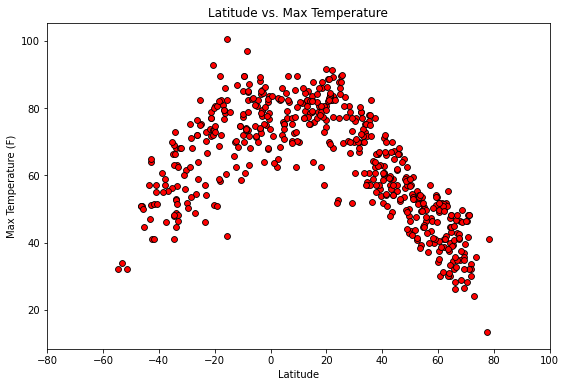

In [12]:
# Setting the size of the frame
plt.figure(figsize=(9,6))

# Plot the latitude vs the Max Temp
plt.scatter(x = weather_df['Latitude'], y = weather_df['Max Temp'],
            linewidths = 0.85, edgecolors = 'black', color = 'red', s=35)

# Adding labels to graph
plt.title(f"Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")

# Update the lower and upper ticks for x and y axis
plt.xlim(-80,100)
#y ticks based on high and low *Max temp* +/- 5 for wiggle room
plt.ylim(min(weather_df['Max Temp']) - 5, max(weather_df['Max Temp']) + 5)

plt.show()

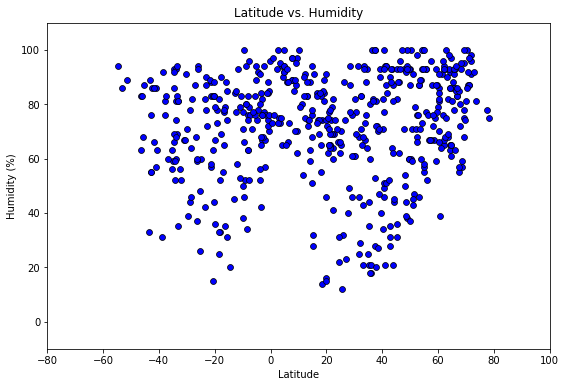

In [13]:
# Setting the size of the frame
plt.figure(figsize=(9,6))

# Plot the lat vs the humidity
plt.scatter(x = weather_df['Latitude'], y = weather_df['Humidity'],
            linewidths = 0.75, edgecolors = 'black', color = 'blue', s=35)

# Adding labels to graph
plt.title(f"Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# Update the lower and upper ticks for x and y axis
#x is standard min/max latitude coordinates
plt.xlim(-80,100)
#y axis was based on top and bottom percentages, with a 10 point wiggle room
plt.ylim(-10, 110)

plt.show()

NameError: name 'weather_dt' is not defined

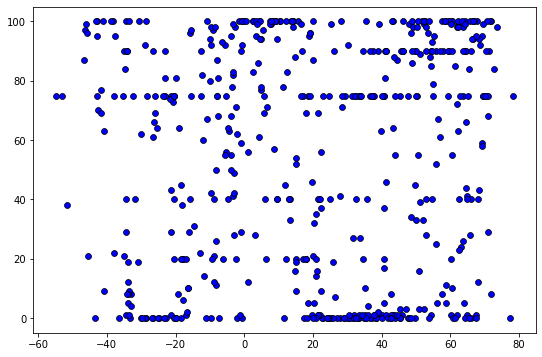

In [14]:
# Setting the size of the frame
plt.figure(figsize=(9,6))

# Plot the lat vs the max temp
plt.scatter(x = weather_df['Latitude'], y = weather_df['Cloudiness'],
            linewidths = 0.75, edgecolors = 'black', color = 'blue', s=35)

# Adding labels to graph
plt.title(f"Latitude vs. Cloudiness ({weather_dt})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

# Update the lower and upper ticks for x and y axis
#x is standard min/max latitude coordinates
plt.xlim(-80,100)
#y axis was based on top and bottom percentages, with a 10 point wiggle room
plt.ylim(-10, 110)

plt.show()

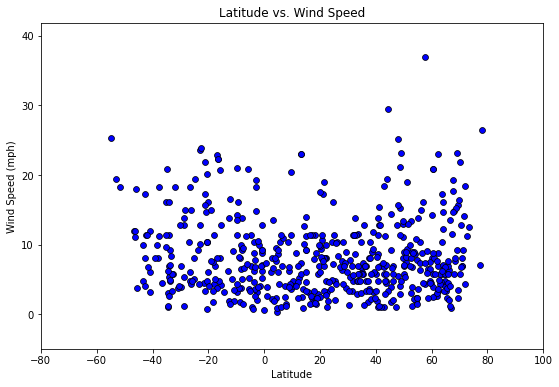

In [15]:
# Setting the size of the frame
plt.figure(figsize=(9,6))

# Plot the lat vs the wind speed
plt.scatter(x = weather_df['Latitude'], y = weather_df['Wind Speed'],
            linewidths = 0.75, edgecolors = 'black', color = 'blue', s=35)

# Adding labels to graph
plt.title(f"Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

# Update the lower and upper ticks for x and y axis
#x is standard min/max latitude coordinates
plt.xlim(-80,100)
#y axis, we want above and below by a certain amount. 5 seemed good enough to center data
plt.ylim(-5, max(weather_df['Wind Speed'])+5)

plt.show()

In [16]:
weather_df.to_csv("../Resources/Weather_data.csv", index=False) 

In [17]:
#Part II
weather_data_file = "../Resources/Weather_data.csv"
weather_df = pd.read_csv(weather_data_file)
weather_data_df = weather_df.drop(["Date"], axis=1)
weather_data_df.head()

City  Latitude  Longitude  Humidity  Max Temp  Cloudiness  Wind Speed  \
0    qaanaaq     77.48     -69.36      78.0     13.41           0        7.02   
1       hede     33.77     120.25      67.0     72.77          27       11.56   
2  carnarvon    -24.87     113.63      60.0     75.20           0       19.46   
3      bluff    -46.60     168.33      83.0     51.01          87       11.99   
4  tuatapere    -46.13     167.68      83.0     51.01          99       11.99   

  Country  
0      GL  
1      CN  
2      AU  
3      NZ  
4      NZ

In [18]:
gmaps.configure(api_key=google_api_key)

In [19]:
locations = weather_data_df[["Latitude", "Longitude"]]
humidity = weather_data_df["Humidity"].astype(float)
#Set the initial figure
fig = gmaps.figure()
#Create the heatmap figure layer
heatmap_layer = gmaps.heatmap_layer(locations, weights=humidity, 
                                   dissipating = False,
                                   max_intensity=6,
                                   point_radius=1)
fig.add_layer(heatmap_layer)
fig

Figure(layout=FigureLayout(height='420px'))

In [20]:
narrowed_df = pd.DataFrame(weather_data_df, columns= ["City", "Max Temp", "Wind Speed", "Cloudiness"])
#Standard restrictions given
max_temp = (narrowed_df["Max Temp"] <=80) & (narrowed_df["Max Temp"]>= 70)
wind_speed = narrowed_df["Wind Speed"] < 10
cloudiness = narrowed_df["Cloudiness"] == 0
narrowed_df[max_temp & wind_speed & cloudiness]

City  Max Temp  Wind Speed  Cloudiness
144       jining     76.03        5.77           0
176        barra     74.75        9.08           0
213        sabha     77.41        6.71           0
224     ismailia     77.13        5.39           0
248     kishtwar     73.65        2.84           0
298      estelle     70.00        6.06           0
301       riyadh     77.00        7.18           0
384     ajdabiya     70.74        7.81           0
388  salinopolis     78.48        9.24           0
437       mehran     71.60        4.70           0
455      awjilah     73.04        7.31           0
468     mahanoro     74.77        4.09           0
478   ridgecrest     75.00        1.30           0
520       tukrah     72.23        8.66           0

In [21]:
#Creating a new DataFrame for just hotels 
hotel_df = pd.DataFrame(weather_data_df, columns = ["City", "Country", "Latitude", "Longitude"])
#Adding Hotel Name column to DataFrame
hotel_df["Hotel Name"] = ""
hotel_df.head()

City Country  Latitude  Longitude Hotel Name
0    qaanaaq      GL     77.48     -69.36           
1       hede      CN     33.77     120.25           
2  carnarvon      AU    -24.87     113.63           
3      bluff      NZ    -46.60     168.33           
4  tuatapere      NZ    -46.13     167.68

In [22]:
#Setting up parameters
location_coordinates = f"{hotel_df['Latitude'][0]}, {hotel_df['Longitude'][0]}"
location_search = "hotel"
location_radius = 5000
location_type = "hotel"

#Inputting parameters in dictionary
params = {
    "location": location_coordinates,
    "keyword": location_search,
    "radius": location_radius,
    "type": location_type,
    "key": google_api_key
}

#Creating the base url
base_url = "https://maps.googleapis.com/maps/api/place/nearbysearch/json"

response = requests.get(base_url, params=params)

In [23]:
pprint(response.json(), depth=1)

{'html_attributions': [], 'results': [...], 'status': 'OK'}


In [24]:
#creates a list to capture hotel_names to insert into dataframe
hotel_name = []

# params dictionary to update each iteration
params2 = {
    "radius": 5000,
    "types": "hotel",
    "keyword": "hotel",
    "key": google_api_key
}

# taken from Airpost_Ratings Example done in class
for index, row in hotel_df.iterrows():
    # get lat, lng from df
    lat = row["Latitude"]
    lng = row["Longitude"]

    # change location each iteration while leaving original params in place
    params2["location"] = f"{lat},{lng}"

    base_url = "https://maps.googleapis.com/maps/api/place/nearbysearch/json"

    # make request and print url
    name_address = requests.get(base_url, params=params2)
    
    # convert to json
    name_address = name_address.json()
    # print(json.dumps(name_address, indent=4, sort_keys=True))
    try:
        hotel_name.append(name_address['results'][0]['name'])
    except IndexError:
        hotel_name.append(np.nan)
hotel_name        

['Qaanaaq Hotel',
 'Fujian Hotel Sheyang',
 'Carnarvon Motel',
 'Foveaux Hotel',
 'Last Light Lodge',
 'Lei Thar Gone Guest House',
 'Hotel Rey Don Felipe Punta Arenas',
 'Kimberleyland Waterfront Holiday Park | Kununurra Accommodation',
 'Laguna Beach Hotel & Spa',
 'Best Western Plus The Ranges Karratha',
 'LÜDERITZ NEST HOTEL',
 nan,
 'Карл Маркс',
 'Hotel Sunroute Patio Goshogawara',
 'Obsidian Hotel',
 'Rosewood Bermuda',
 'The Explorer Hotel',
 'The hotel complex "Rus"',
 'Manuia Beach Resort',
 'Les Embruns Du Baril',
 'Auyuittuq Lodge (Inns North)',
 'Esperance Chalet Village',
 nan,
 'Beachfront Voyager Motor Inn',
 'Pension Bianca & Benoit',
 'Hôtel Panorama',
 'Hôtel Georges Faustin Aurat',
 'Gostinitsa "Zapolyar\'ye"',
 'Hótel Höfn',
 'HYATT SALALAH HOTEL',
 'Welk Resorts Cabo San Lucas - Sirena del Mar',
 'Park Inn Haugesund Airport',
 'Arktika',
 'Quinta Das Buganvílias',
 'Hotel Cecil',
 'Paradise First Hotel',
 'Vardö Apartments',
 'Harbour View',
 nan,
 'HOSTEL A COROA

In [25]:

hotel_df['Hotel Name'] = hotel_name
hotel_df.dropna()
hotel_df.to_csv("../Resources/Hotel_data.csv", index=False)

In [27]:
#Found this code online
info_box_template = """
<dl>
<dt>Name</dt><dd>{Hotel Name}</dd>
<dt>City</dt><dd>{City}</dd>
<dt>Country</dt><dd>{Country}</dd>
</dl>
"""

hotel_info = [info_box_template.format(**row) for index, row in hotel_df.iterrows()]
locations = hotel_df[["Latitude", "Longitude"]]

In [29]:
markers = gmaps.marker_layer(locations)
fig.add_layer(markers)
fig

Figure(layout=FigureLayout(height='420px'))